# Homework 3: Random Variables and Their Distributions
***

**Name**: 

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday October 13th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.special import binom
%matplotlib inline

### [15 points] Problem 1 
***

A young boy and an old woman are playing [tic tac toe](https://en.wikipedia.org/wiki/Tic-tac-toe). Unfortunately, the boy is too young to know the strategy and the old woman can't see the board well enough to enact a strategy. Nevertheless, they are content to play games with each other. The boy plays first and randomly places an X in an open square. The woman plays next, and randomly places an O in one of the remaining open squares. They each play randomly until someone gets three in a row, and then start a new game. Estimate, via simulation, the probability that the boy wins.

**Note**: Part of the goal of this exercises is to give you more practice structuring a simulation. Definitely don't be afraid to write helper functions that get called from your main simulation routine. Things you might want to do modularly are (i) play a single game of tic-tac-toe, (ii) place an $X$ or an $O$ on an free square, or (iii) check if someone has one the game. This problem will not be autograded so feel free to get creative.  Just make sure to clearly display your results in code output and summarize things in Markdown. 

In [59]:
# Function to check if one has win the game
# 这个函数来判断是否当前的_chess取得了胜利
def is_win(_chess, win_tie_lines):
    state = list(map(lambda x: sum([1 for i in _chess if i in x]), win_tie_lines))
    return False + state.count(3)

# Simulate placeing an  X  or an O on an free square
# 模拟放子的过程
def put_chess(board, _chess):
    idx = np.random.randint(len(board))
    chess = board[idx]  # 落子的地方
    _chess.append(chess)
    board.pop(idx)

# 出现这里面的任意一种时,即表示取得了胜利
win_tie_lines = [[1,2,3],[4,5,6],[7,8,9],[1,4,7],[2,5,8],[3,6,9],[1,5,9],[3,5,7]]

exper_num = 50000         # Iteration number
win_list = [0]*exper_num  # Initialize variable for recording win or loss of X

# Loop
for i in range(exper_num):
    X_chess, O_chess = [], []
    board = list(range(1,10))
    num_X, num_O = 0, 0  # 记录落子的数目
    board_state = False
    
    while board_state == False:
        # X 先下
        num_X += 1
        put_chess(board, X_chess)
        
        if num_X >= 3:
            board_state = is_win(X_chess, win_tie_lines)
            if board_state > 0:
                win_list[i] = 1  # X赢了就赋值为1
                break
            
        if num_X + num_O == 9:  # 如果已经总下了9个子,则终止本局
            break
            
        # O 后下
        num_O += 1
        put_chess(board, O_chess)    
        if num_O >= 3:
            board_state = is_win(O_chess, win_tie_lines)
            if board_state > 0:
                win_list[i] = -1  # X输了就赋值为0
                break
    
# 计算每一种的概率:
print('Probability of X win: '+str(win_list.count(1)/exper_num))
print('Probability of O win: '+str(win_list.count(-1)/exper_num))    
print('Probability of Draw:  '+str(win_list.count(0)/exper_num)) 

Probability of X win: 0.58358
Probability of O win: 0.28918
Probability of Draw:  0.12724


### [20 points] Problem 2 
***

Let $X$ be the lifespan (in years) of a BF Goodrich Rugged Trail T/A tire under normal driving conditions, and suppose $X$ is described by the following probability density function: 

$$
f(x) = \left\{ 
\begin{array}{ll}
\dfrac{10}{cx^2} & 1 \leq x \leq 10 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

对f(x)在$\leq x \leq 10$的积分值等于1,则有:
$$
\begin{split}
\int_1^{10}\frac{10}{cx^2}=\frac{-10}{xc}\bigg |_{1}^{10}=\frac{9}{c}=1
\end{split}
$$
Thus, we hava: $c=9$

**Part B**: Compute the cumulative distribution function $F(y)$ for $X$. 

根据分布函数的定义可知: 当y在[1,10]之间时：
$$
\begin{split}
F(y)=\int_1^y f(x)=\int_1^y \frac{10}{9x^2}=\frac{10}{9}-\frac{10}{9y}
\end{split}
$$
有：
$$
\begin{align*}
F(y)=\left\{\begin{matrix}
0 \qquad\ &y<1\\
\frac{10}{9}-\frac{10}{9y} &1\leqslant y\leqslant 10\\ 
1 \qquad\ &10<y\\\\
\end{matrix}\right.
\end{align*}
$$

**Part C**: Use the cdf you computed in **Part B** to find the probability that a single tire goes longer than 8 years without failing. 

计算一个轮胎的寿命超过8年的概率, 可以表示为: $F(Y \gt 8)$
$$F(Y \gt 8)=1-F(8)=1-(\frac{10}{9}-\frac{10}{9*8})=\frac{1}{36}=0.0278$$

**Part D**: Use the cdf you computed in **Part B** to determine the number of years within which $90\%$ of all tires will need to be replaced. In other words, determine the 90th percentile of the distribution of $X$. 

设当第$y*$年的时候,90%的轮胎需要更换,则有:
$$F(y^*)=0.90$$
即: $$\frac{10}{9}-\frac{10}{9y^*}=0.90$$
Thus, we hava: $$y*=\frac{100}{19}=5.2631$$
也就是说第5.2631年的时候,轮胎坏的概率是90%,如果四舍五入的话,可以取6年.

**Part E**: What is the probability that all four BF Goodrich Rugged Trail T/A tires on a vehicle last longer than 8 years without failing? 

在Part B里面已经计算了一个轮胎使用了8年都没有坏的概率,这里讲的是4个轮胎8年都没有坏的概率,应该为:
$$P=(\frac{1}{36}^4)=5.9537e-07$$

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [60]:
def pmf_natural(x):
    if x>=1 and x<=9:
        return np.log10((x+1)/x)
    else:
        print('Input must within 1 to 9')
        
# x的取值范围是1-9,对每个值进行概率计算,然后相加, 如果结果等于1,则表示f(x)是...
# Argu f(x) is a well-defined probability mass function
probs = []
for x in range(1,10):
    probs.append(pmf_natural(x))

print('Sum of the probability is: '+str(sum(probs)))

Sum of the probability is: 1.0


**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

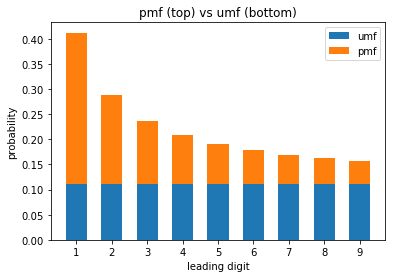

In [61]:
pmf = [pmf_natural(x) for x in range(1,10)]  # pmf 分布的概率
umf = [1/9]*9  # Discrete Uniform distribution probability 

# Make stacked bar plots
ind = range(1,10)
width = 0.6
p1 = plt.bar(ind, umf, width)
p2 = plt.bar(ind, pmf, width, bottom=umf)
plt.ylabel('probability')
plt.xlabel('leading digit')
plt.xticks(ind, ind)
plt.title('pmf (top) vs umf (bottom)')
plt.legend((p1[0], p2[0]), ('umf','pmf'))
plt.show()

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [62]:
def cdf_natural(y):
    if y>=1 and y<=9:
        return np.sum([pmf_natural(x) for x in range(1,y+1)])
    else:
        print('Input must within 1 to 9')

print('Probability of leading digit in a number is at most 4: '+str(cdf_natural(4)))
print('Probability of leading digit in a number is at most 5: '+str(cdf_natural(5)))

Probability of leading digit in a number is at most 4: 0.698970004336
Probability of leading digit in a number is at most 5: 0.778151250384


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

In [63]:
# Load the data
data = pd.read_table('./tax_data.txt')

# Extract leading digit
data['lead_dig'] = data['Tax Incomes'].agg(lambda x: int(str(x)[0]))

# Count the number of occurrences of each leading digit
lead_dig_count = data.groupby('lead_dig')['lead_dig'].count()
print(lead_dig_count)

lead_dig
0     6758
1    49430
2    32276
3    18629
4    13499
5    10892
6     7862
7     6198
8     5934
9     6040
Name: lead_dig, dtype: int64


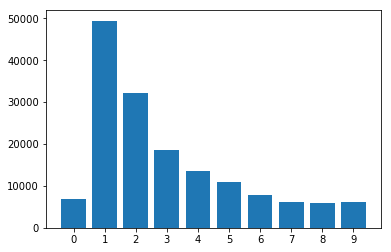

In [64]:
plt.bar(range(10), lead_dig_count)
plt.xticks(range(10), range(10))
plt.show()

lead_dig
1    49430
2    32276
3    18629
4    13499
5    10892
6     7862
7     6198
8     5934
9     6040
Name: lead_dig, dtype: int64


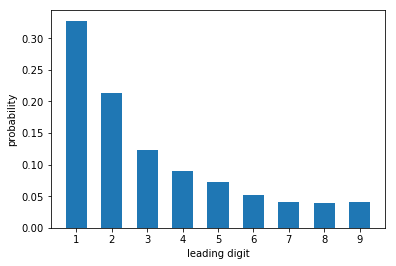

In [65]:
# 我们的概率分布里面只有1-9,这里出现了0,因此在处理之前需要将leading digit为0的数据先去除掉
data = data[data['lead_dig'] != 0]

# 重新统计每个leading digit出现的次数
lead_dig_count = data.groupby('lead_dig')['lead_dig'].count()
print(lead_dig_count)

# 统计每个leading digit出现的概率
lead_dig_prob = lead_dig_count / lead_dig_count.sum()

# Draw
ind = range(1,10)
p1 = plt.bar(ind, lead_dig_prob, width=0.6)
plt.ylabel('probability')
plt.xlabel('leading digit')
plt.xticks(ind, ind)
plt.show()

总结: 从上图中可以看出,这个概率分布和Part B里面的pmf分布是很相似的,因此,应该没有欺诈!

### [25 points] Problem 4 
***

You are a data-driven transportation engineer investigating the effect that a particular [vertical lift bridge](https://en.wikipedia.org/wiki/Vertical-lift_bridge) has on city traffic.  Every time a boat passes under the bridge, cars must stop while the bridge is raised to accommodate the height of the boat.  As both boat and car traffic increases, city planners are considering building a new taller bridge that will never impede the flow of traffic. As part of a larger simulation of traffic congestion, you need to decide how to model the arrival of boats at the bridge.  From your Intro to Data Science class you remember that the time _between_ independent arrivals are usually modeled by an Exponential distribution.  Finally, you have access to a report that says on average 20 boats cross under the bridge per day.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-boat times do in-fact follow $Exp(20)$, what distribution would you expect the **number** of boats that cross under the bridge on a given day to follow?  What are the parameter(s) of the distribution? 

   已知船只到达的时间间隔满足Exp(20)的指数分布(即$\lambda$=20), 这里, $\lambda$ 的值是有含义的, 表示单位时间内事件发生的平均次数. 这里的单位时间为一天, 因此, $\lambda=20$表示一天内船只经过的平均数目为20. 
   
   至于船只数目的分布,这里猜想其满足Poisson分布,Poisson分布的表达式为:
   $$
   P(X(t)=n) = \frac{e^{-\lambda t} (\lambda t)^n}{n!}
   $$
   
   这里, n表示船只经过的数目, 考虑到指数分布于Poisson分布之间的关系, 这里的Poisson分布的$\lambda$参数的值也等于20. 因此, 船只经过数目满足分布:
      $$
   P(X(t)=n) = \frac{e^{-20t} (20t)^n}{n!}
   $$

**Part B**:  What is the probability that 25 boats cross under the bridge on a particular day?

In [66]:
def poisson_distr(n, lambda_, t=1):
    return (((lambda_*t)**n)*np.exp(-lambda_*t))/np.math.factorial(n)
    
print('Probability 25 boats cross under the bridge on a particular day: '+str(poisson_distr(n=25, lambda_=20)))

Probability 25 boats cross under the bridge on a particular day: 0.04458764910826788


**Part C**:  What is the probability that 15 boats or fewer cross under the bridge on a particular day?

In [67]:
cumsum_prob = np.sum([poisson_distr(n, 20) for n in range(15+1)])
print(cumsum_prob)

0.15651313464


**Part D**: What is the probability that between 1 and 2 hours pass between two boat crossings? 

这道题的意思应该是两艘船前后经过的时间间隔在1-2小时之间的概率!
$$
\begin{split}
P(\frac{1}{24} \leq X\leq \frac{2}{24})&=P(X\leq \frac{2}{24})-P(X\leq \frac{1}{24}) \\
&=(1-e^{-20*\frac{2}{24}})-(1-e^{-20*\frac{1}{24}})
&=0.2457
\end{split}
$$

**Part F**: Write a function boat_count that takes as it's sole argument the rate parameter $\lambda$ with units boats per day. Your function should simulate boat arrivals at the bridge by sampling between-boat times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function and return the number of boats that pass under the bridge on a single simulated day. 

**Note**: Do not change the API for this function.  

In [68]:
def boat_count(lam):
    if lam > 0:
        beta = 1.0 / lam
        duration, count = 0, 0
        while duration < 1:
            duration += np.random.exponential(beta)
            count += 1
            
        return count-1
    
lam = 20
print('lam = '+str(lam)+' ; boat count: '+str(boat_count(lam)))

lam = 20 ; boat count: 21


**Part G**: Write a function boat_count_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of days to simulate. Your function should use the function you wrote in **Part F** to simulate many independent days of boat crossings and estimate the probability that 15 boats or fewer cross under the bridge on a particular day. For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part C**?  

**Note**: Do not change the API for this function.  

In [69]:
def boat_count_sim(lam, num_days=int(1e3)):    
    num_boat_ltq_15 = sum([1 for day in range(num_days) if boat_count(lam) <= 15])
    return num_boat_ltq_15 / num_boat_ltq_15

lam = 20
boat_count_sim(lam)

1.0

**Part H**: Write a function boat_time_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of boat arrivals to simulate. Your function should sample boat arrivals via [np.random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) and estimate the probability that boats arrive between 1 and 2 hours apart.  For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part D**?  

**Note**: Do not change the API for this function.  


In [70]:
def boat_time_sim(lam, num_boats=int(1e3)):
    count = 0
    beta = 1.0 / lam
    for i in range(num_boats):
        duration = np.random.exponential(beta)
        if duration >= 1.0/24 and duration <= 2.0/24:
            count += 1
        
    return count / num_boats

print(boat_time_sim(20))

0.256


### [20 points] Problem 5 
***

You are the team manager for the CU intramural Quidditch team, the Boulder Beaters, and you've just made it to the national championship series against the Stanford Snitching Snitches. The typical Quidditch championship is a best of 11 series, so the first team to win 6 matches is declared the winner.  Furthermore, based on a rigorous statistical analysis of regular season play, the probability that the Boulder Beaters win any one match against the Snitching Snitches is given by $p = 0.55$.  

**Part A**: What is the probability that you win the 11-game series on the 8th match played? 


前7局有5局胜利, 2局失败, 总共有$C_{7}^{5}$种组合, 胜利的概率为: $p$; 失败的概率为: $1-p$, 总概率$P$为:
$$
\begin{split}
P &= p*C_{7}^{5}*p^5(1-p)^2 \\
&=0.55*21*0.55^5*(1-0.55)^2 \\
&=0.1177
\end{split}
$$

**Part B**: What is the probability that you win the 11-game series in any valid number of matches? 

情况1: 到第6局最后胜利: $P_1$
$$
P_1=p*C_{5}^{5}*p^5=0.55*1*0.55^5=0.0276
$$

情况2: 到第7局最后胜利: $P_2$
$$
P_2=p*C_{6}^{5}*p^5*(1-p)=0.55*1*0.55^5*(1-0.55)=0.0747
$$

情况3: 到第8局最后胜利: $P_3$
$$
P_3=p*C_{7}^{5}*p^5*(1-p)^2=0.55*1*0.55^5=0.1177
$$

情况4: 到第9局最后胜利: $P_4$
$$
P_4=p*C_{8}^{5}*p^5*(1-p)^3=0.55*1*0.55^5=0.1412
$$

情况5: 到第10局最后胜利: $P_5$
$$
P_5=p*C_{9}^{5}*p^5*(1-p)^4=0.55*1*0.55^5=0.1430
$$

情况6: 到第11局最后胜利: $P_6$
$$
P_6=p*C_{10}^{5}*p^5*(1-p)^5=0.55*1*0.55^5=0.1287
$$

总概率: $P=P_1+P_2+P_3+P_4+P_5+P_6=0.6331$

**Part C**: The winner of the champsionship will take home \$10,000 to use for equipment and victory parties in the following season. Because the stakes are so high, you've decided to hire a famous Quidditch consultant, Bludger Bob, to help you prepare for each match. With Bob's help your probability of winning any given match increases to $p = 0.7$.  Bludger Bob charges a fee of \$100 per game, but as a testament to his confidence in his abilities, only charges you the \$100 for games that you win and only if you win the series.  So, if you play a 11-game series and win you will take home \$10,000 less \$600 for Bludger Bob's fees, for a total payout of \$9,400.  What is the expected payout for an 11-game series?   

进行11场比赛, 每场获胜的概率是p=0.7, 设最后获胜的概率为$P_win$, 这个概率的计算方式与Part B相似, 只是每场获胜的概率p从0.55变成了0.7. 设队伍在第$x$场后会取得最终的胜利,有$x=\{6,7,...,11\}$. 则有:
$$P(X=x)=p^6*C_{x-1}^{5}*(1-p)^{x-6}$$
Thus:
$$P(X=6)=0.1176$$
$$P(X=7)=0.2118$$
$$P(X=8)=0.2224$$
$$P(X=9)=0.1779$$
$$P(X=10)=0.1201$$
$$P(X=11)=0.0720$$
Thus:
$$P_win = \sum_{x=6}^{11}P(X=x)=0.9218$$
如果取得的胜利,扣除了给顾问的$600之后,还剩下$9400,计算期望:
$$E=P_{win}*9400+(1-P_{win})*0=8664.69$$

**Part D**: This year the National Intramural Quidditch Association (NIQA) is implementing an experimental rule.  As the team with the best record in the regular season you will get to choose the length of the championship series.  Specifically, you can choose the series length to be anywhere from $N=3, 5, 7, \ldots, 99$ games long.  Assuming that you plan to use Bludger Bob's services and considering the fact that you have a better than even chance of winning each game, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 


解释: 由于我队的胜率比另外一队要大, 因此, 比赛次数越大, 我们最后赢的概率就越大; 但是由于我们队聘请了Bludger Bob作为比赛的顾问, 他是按照比赛胜利的场数收钱的, 如果不请他当顾问的话, 我们肯定选择最大的N(即99), 那时我们队的胜率最大, 但是现在请了他当顾问, 比赛拉的越长, 我们就必须多付更多的钱给他. 因此我们需要在其中找到一个平衡点. 怎么找这个平衡点呢? 我们可以计算一下N=3,5,7,...,99这每一种N下面我们最后取得胜利的概率以及失败的概率,然后计算胜利和失败情况下会得到的payment, 然后计算每种情况下的期望值, 找到一个N, 使得期望达到最大, 此时的N就是我们想要的!!!

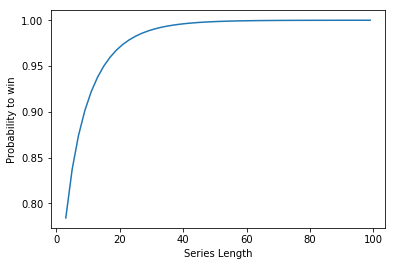

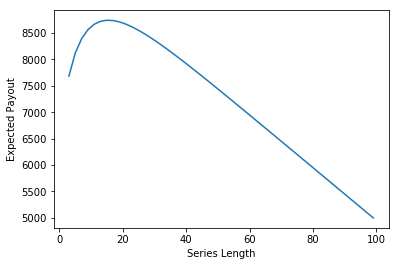

In [71]:
def factorial(n):
    if n < 2:
        return 1
    else:
        return n * factorial(n-1)
    
series_num_payment = []
expected_payment = []
probs = []
for N in range(3,100,2):
    num_to_win = int(N / 2) + 1  # Num of match to win
    probs_curr_N = 0             # 当前N下赢的概率
    for i in range(num_to_win, N+1):
        num_combin = factorial(i-1)/(factorial(i-num_to_win) * factorial(num_to_win-1))
        prob_to_win = num_combin * (p**(num_to_win-1)) * ((1-p)**(i-num_to_win)) * p
        probs_curr_N += prob_to_win
        
    probs.append(probs_curr_N)
    expected_payment_curr_N = probs_curr_N * (10000-100*num_to_win)  # 数据期望
    expected_payment.append(expected_payment_curr_N)

index_maxinum = np.argmax(expected_payment)

# 每种比赛场次下获胜的概率
plt.plot(range(3,100,2), probs)
plt.xlabel('Series Length')
plt.ylabel('Probability to win')
plt.show()

# plot
plt.plot(range(3,100,2), expected_payment)
plt.xlabel('Series Length')
plt.ylabel('Expected Payout')
plt.show()


**Part E**: Write a function optimal_series that takes in $p$, the probability that your team wins an individual game, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

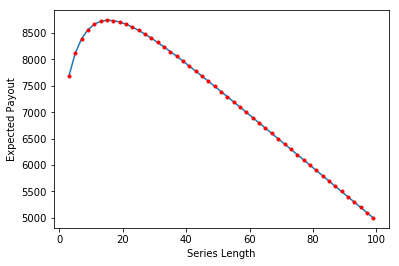

When p = 0.7 , optimal series length is 15


In [72]:
def factorial(n):
    if n < 2:
        return 1
    else:
        return n * factorial(n-1)
    
def optimal_series(p):
    series_num_payment = []
    expected_payment = []
    for N in range(3,100,2):
        num_to_win = int(N / 2) + 1  # Num of match to win
        probs_curr_N = 0             # 当前N下赢的概率
        for i in range(num_to_win, N+1):
            num_combin = factorial(i-1)/(factorial(i-num_to_win) * factorial(num_to_win-1))
            prob_to_win = num_combin * (p**(num_to_win-1)) * ((1-p)**(i-num_to_win)) * p
            probs_curr_N += prob_to_win
        
        expected_payment_curr_N = probs_curr_N * (10000-100*num_to_win)  # 数据期望
        expected_payment.append(expected_payment_curr_N)
        
    index_maxinum = np.argmax(expected_payment)
    
    # plot
    plt.plot(range(3,100,2), expected_payment)
    plt.plot(range(3,100,2), expected_payment, 'r.')
    plt.xlabel('Series Length')
    plt.ylabel('Expected Payout')
    plt.show()
    
    return range(3,100,2)[index_maxinum]

p = 0.7
optimal_series_length = optimal_series(p)
print('When p = '+str(p)+' , optimal series length is '+str(optimal_series_length))

### Challenge Problem - Which Geyser Gushes First? 
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

The following Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You arrive at the beautiful Three Geysers National Park. You read a placard explaining that the three eponymous geysers — creatively named $A$, $B$ and $C$ — erupt at intervals of precisely two hours, four hours and six hours, respectively. However, you just got there, so you have no idea how the three eruptions are staggered. Assuming they each started erupting at some independently random point in history, what are the probabilities that A, B and C, respectively, will be the first to erupt after your arrival?
